# III - Planing Plates: Water-skiing with Small Angle
> _If you cannot see the HTML rendering (e.g. colors), view this notebook [here](https://nbviewer.jupyter.org/github/Mipanox/ME303/blob/master/dynamics/Planing.ipynb)_

## <font color="blue">Equations</font>
### <font color="green">Forces</font>
Here the formulae for a flat planing plate are used (see the models [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb)).
<br><br>
Let the angle of attack be $\tau$, the aspect ratio of the foot (plate) be $\lambda\sim1.4$ (with width $b$), the forces are written as (some detail factors of order unity are omitted):
<br><br>
$
\;\;\;\;F_L \equiv \frac{1}{2}\rho_w v^2b^2 C_L
$
<br><br>

$
\;\;\;\;F_D \equiv F_L \left (  \tan\tau + \frac{C_f\lambda}{C_L\cos\tau} \right ) \approx F_L \left( \tau + \frac{C_f\lambda}{C_L} \right)
$

<br><br>
where $C_L$ and $C_f$ are the force coefficients for lift and drag respectively. The extra terms, as might be unfamiliar from aerodymanics, are due to buoyancy and pressure, which can be important when the plate is moving rather slowly.
<br><br>
The coefficients are given by
<br><br>
$
\;\;\;\;C_L = \tau^{1.1}\left( 0.0120\lambda^{1/2} + \frac{0.0055\lambda^{5/2}}{C_v^2} \right)
$
<br>
$
\;\;\;\;C_f = 1.328/\sqrt{Re}
$
<br><br>
where the Froude number $C_v \equiv v/\sqrt{gb}$ quantifies the characteristic speed.

### <font color="green">Power</font>
Again, the power is easy:
<br><br>
$
P_{D,\text{foot}} = F_D \times v
$
where the speed $v$ can be either the skiing speed (phase III) or the mean decelerating speed.

---
## <font color="blue">Parameters</font>
_(See also the model [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb) for assumptions)_<br>
_(Note: All the numbers are based on the kinematics (see the kinematics [notebook](https://github.com/Mipanox/ME303/blob/master/kinematics/kinematics.ipynb) and [estimates](https://github.com/Mipanox/ME303/blob/master/others/estimates.ipynb))_

In [4]:
exec(open('../codes/preset.py').read())
%matplotlib inline

In [5]:
## read in parameters
sho_df = pd.read_csv('../others/par_data/sho_par.csv')
avo_df = pd.read_csv('../others/par_data/avo_par.csv')

In [6]:
sho_df

,Unnamed: 0,vx_sf,vx_de,vx_ld,t_dec,w_f,w_a,foot_ang,foot_len,body_m,wing_a,wing_r,ang
0,0,1434.8684,764.809273,89.894818,0.501044,6.632416,21.709066,10,10,600,15,35,20


---
<br><p style="text-indent: 20px">`speed` $v_\text{ski} \approx 90$cm/s on average
<br><p style="text-indent: 20px">`speed` $v_\text{dec} \approx 765$cm/s on average
<br><p style="text-indent: 20px">`angle` $\tau\approx10^\circ$
<br><p style="text-indent: 20px">`ratio` $\lambda=\text{length}/\text{width}\approx1.4$
<br><p style="text-indent: 20px">`width` $b\approx7$cm

### <font color="red">Calculations</font>

In [15]:
## parameters
v_ski = float(sho_df['vx_ld']) * u.cm/u.s
v_dec = float(sho_df['vx_de']) * u.cm/u.s
v_sf  = float(sho_df['vx_sf']) * u.cm/u.s

v_wr  = [v_sf,v_dec,v_ski]

tau   = float(sho_df['foot_ang']) * u.deg
lba   = 1.4
b     = 7. * u.cm

body_m = float(sho_df['body_m']) * u.g
t_dec  = float(sho_df['t_dec']) * u.s

In [45]:
exec(open('../codes/planing.py').read())

## <font color="blue">Results</font>

In [51]:
sho_ = Planing(tau,lba,b,v_wr,body_m,t_dec)

F_L,F_D = sho_.lift_and_drag_forces()
P_D     = sho_.drag_power()
v_f     = sho_.decele()

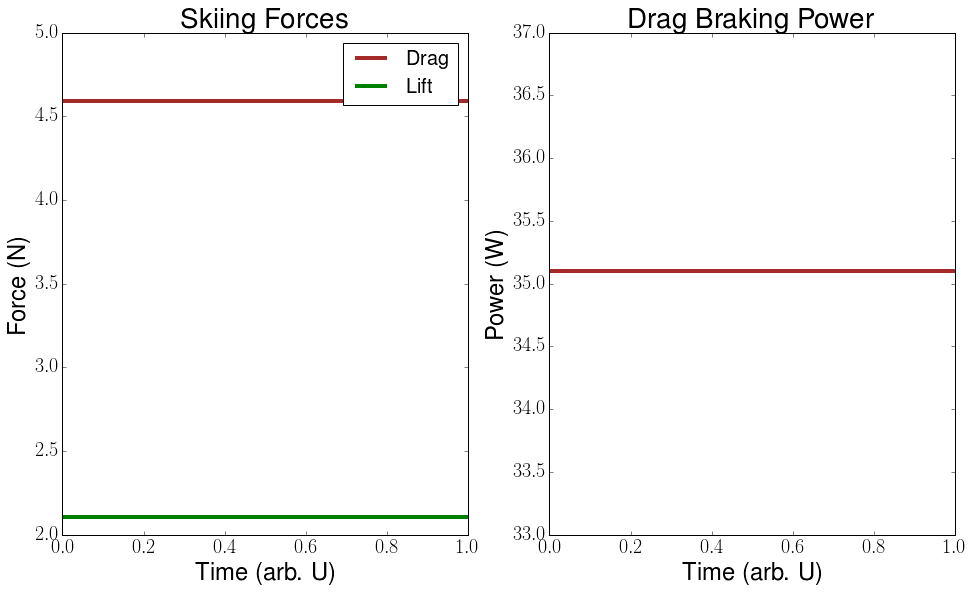

In [47]:
## plotting
### forces
plt.figure(figsize=(16,9))

plt.subplot(121)
plt.plot([0,1],[F_D.value]*2,'brown',lw=4,label="Drag")
plt.plot([0,1],[F_L.value]*2,'green',lw=4,label="Lift")
plt.legend(); plt.xlabel('Time (arb. U)'); plt.ylabel('Force (N)')
plt.title('Skiing Forces')

### power
plt.subplot(122)
plt.plot([0,1],[P_D.value]*2,'brown',lw=4)
plt.xlabel('Time (arb. U)'); plt.ylabel('Power (W)')
plt.title('Drag Braking Power')

(<matplotlib.text.Text at 0x112968d10>,
 <matplotlib.legend.Legend at 0x1129a7e50>)

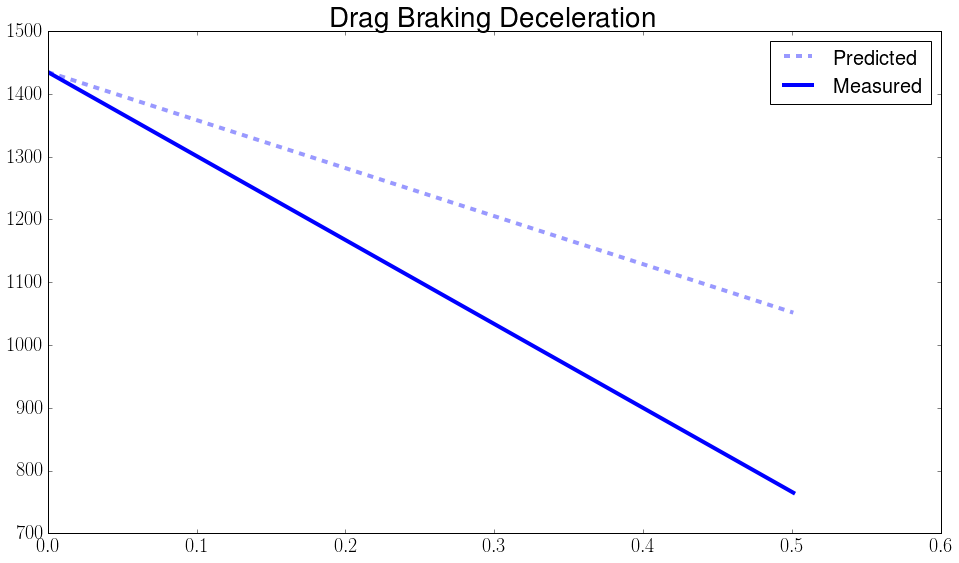

In [62]:
plt.figure(figsize=(16,9))
plt.plot([0,t_dec.value],[v_sf.value,v_f.value],'b--',label='Predicted',lw=4,alpha=0.4)
plt.plot([0,t_dec.value],[v_sf.value,v_dec.value],'b',label='Measured',lw=4)
plt.title('Drag Braking Deceleration'), plt.legend()

### <font color="magenta">Wing Braking + Skiing</font>
How about incorporating the wing braking...

In [60]:
## re-generate results from Braking...
exec(open('../codes/brake.py').read())

In [55]:
wing_a = float(sho_df['wing_a']) * u.cm
wing_r = float(sho_df['wing_r']) * u.cm
wing_alp_sho = float(sho_df['ang']) * u.deg

##
sho = Brake(wing_a,wing_r,wing_alp_sho,v_dec,v_sf,t_dec,body_m)
sho_fd = sho.transl_force()
sho_pd = sho.transl_d_power()
sho_dec_v = sho.decele()

In [61]:
## combined final velocity
sho_cb_v = sho_dec_v + v_f - v_sf

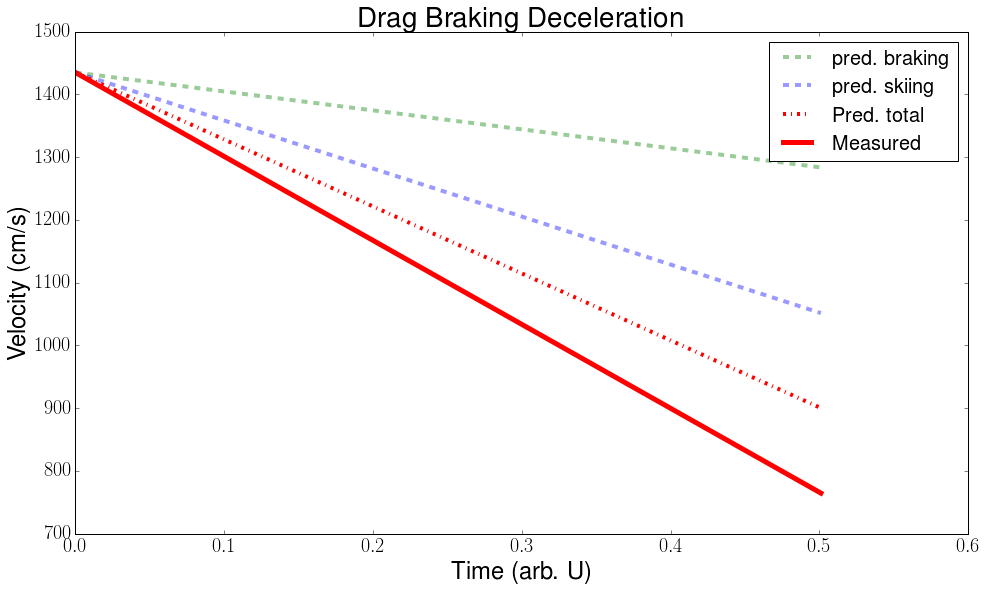

In [64]:
plt.figure(figsize=(16,9))
plt.plot([0,t_dec.value],[v_sf.value,sho_dec_v.value],'g--',label='pred. braking',lw=4,alpha=0.4)
plt.plot([0,t_dec.value],[v_sf.value,v_f.value],'b--',label='pred. skiing',lw=4,alpha=0.4)
plt.plot([0,t_dec.value],[v_sf.value,sho_cb_v.value],'r-.',label='Pred. total',lw=4)
plt.plot([0,t_dec.value],[v_sf.value,v_dec.value],'r',label='Measured',lw=5)
plt.legend(); plt.xlabel('Time (arb. U)'); plt.ylabel('Velocity (cm/s)')
plt.title('Drag Braking Deceleration')

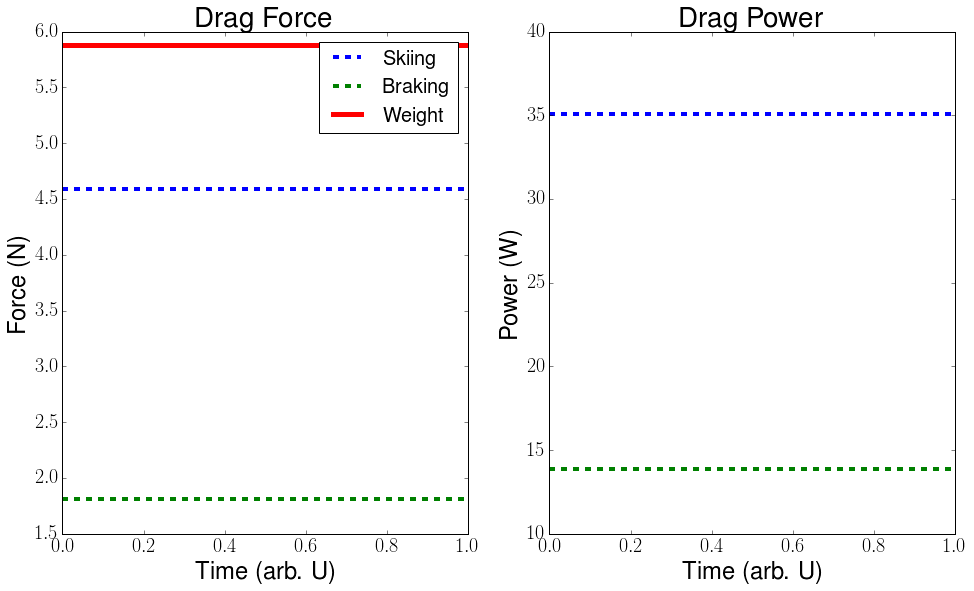

In [66]:
## plotting
g0 = 9.8 * u.m/u.s**2
mm = (body_m * g0).to(u.N)
### forces
plt.figure(figsize=(16,9))

plt.subplot(121)
plt.plot([0,1],[F_D.value]*2   ,'b--',lw=4,label="Skiing")
plt.plot([0,1],[sho_fd.value]*2,'g--',lw=4,label="Braking")
plt.plot([0,1],[mm.value]*2,    'r'  ,lw=5,label="Weight")
plt.legend(); plt.xlabel('Time (arb. U)'); plt.ylabel('Force (N)')
plt.title('Drag Force')

### power
plt.subplot(122)
plt.plot([0,1],[P_D.value]*2   ,'b--',lw=4,label="Skiing")
plt.plot([0,1],[sho_pd.value]*2,'g--',lw=4,label="Braking")
plt.xlabel('Time (arb. U)'); plt.ylabel('Power (W)')
plt.title('Drag Power')